## Breast Cancer Prediction

### 1.Sourcing and Loading

#### 1a. Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

#### 1b. Load data

In [2]:
data = pd.read_csv('../Project_#3/data.csv')

### 2. Data Wrangling

In [3]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data = data.drop(labels= ["Unnamed: 32", "id"], axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

##### Converting diagnosis datas to numeric version

In [10]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
data['diagnosis'] = lbl.fit_transform(data['diagnosis'])
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

### 3. EDA

In [11]:
#Counts of response variable values
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [12]:
#Checking class imbalancing
data.shape

(569, 31)

Text(0.5, 1.0, 'Pie chart of Diagnosis')

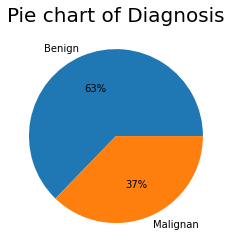

In [13]:
fig = plt.pie(data.diagnosis.value_counts(), labels = ['Benign', 'Malignan'], autopct="%1.0f%%")
plt.title('Pie chart of Diagnosis', fontsize = 20)

### Visualize Data

#### Correlation

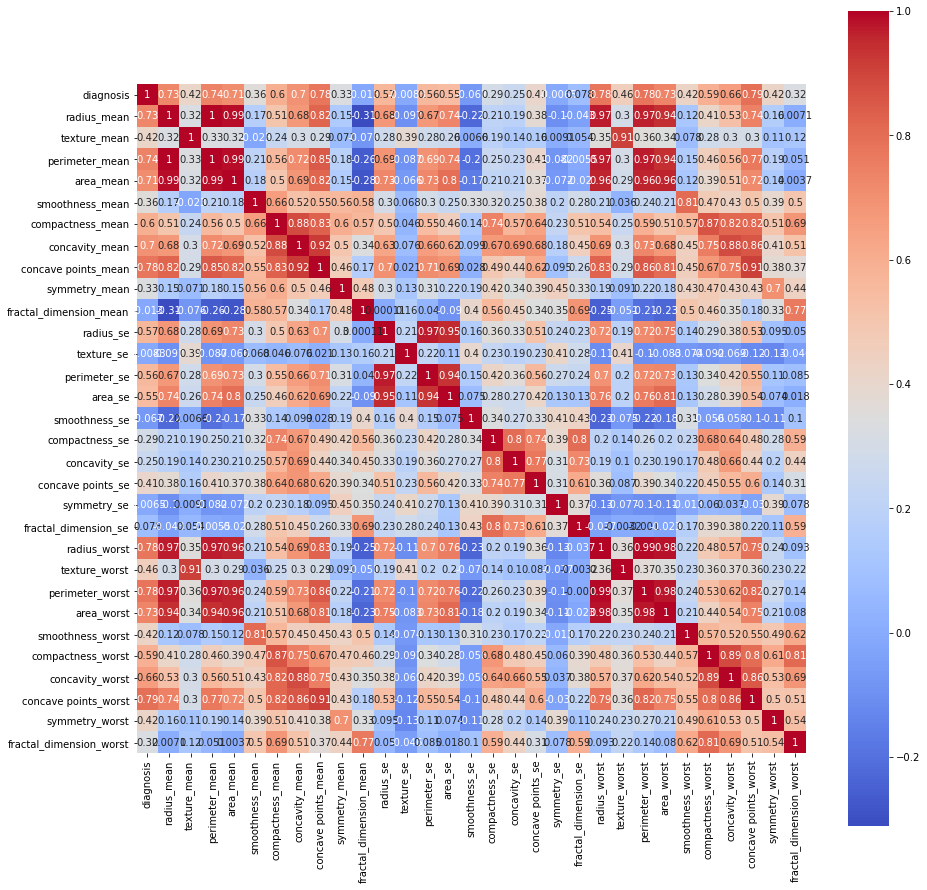

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), square="True", annot=True, cmap= "coolwarm")
plt.show()

##### Mean

In [15]:
data_mean = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]

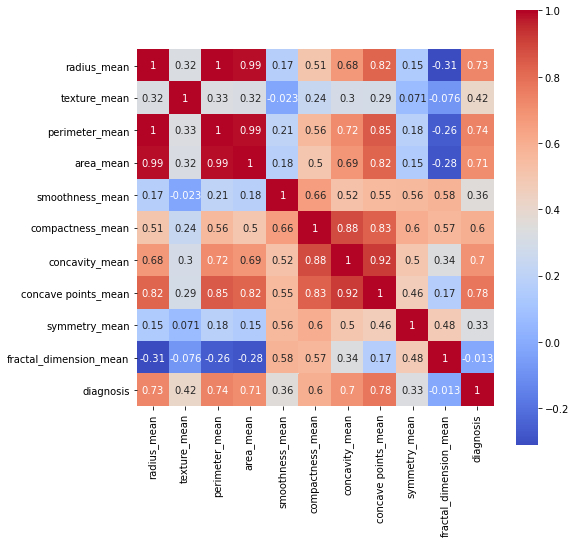

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(data_mean.corr(), square="True", annot=True, cmap= "coolwarm")

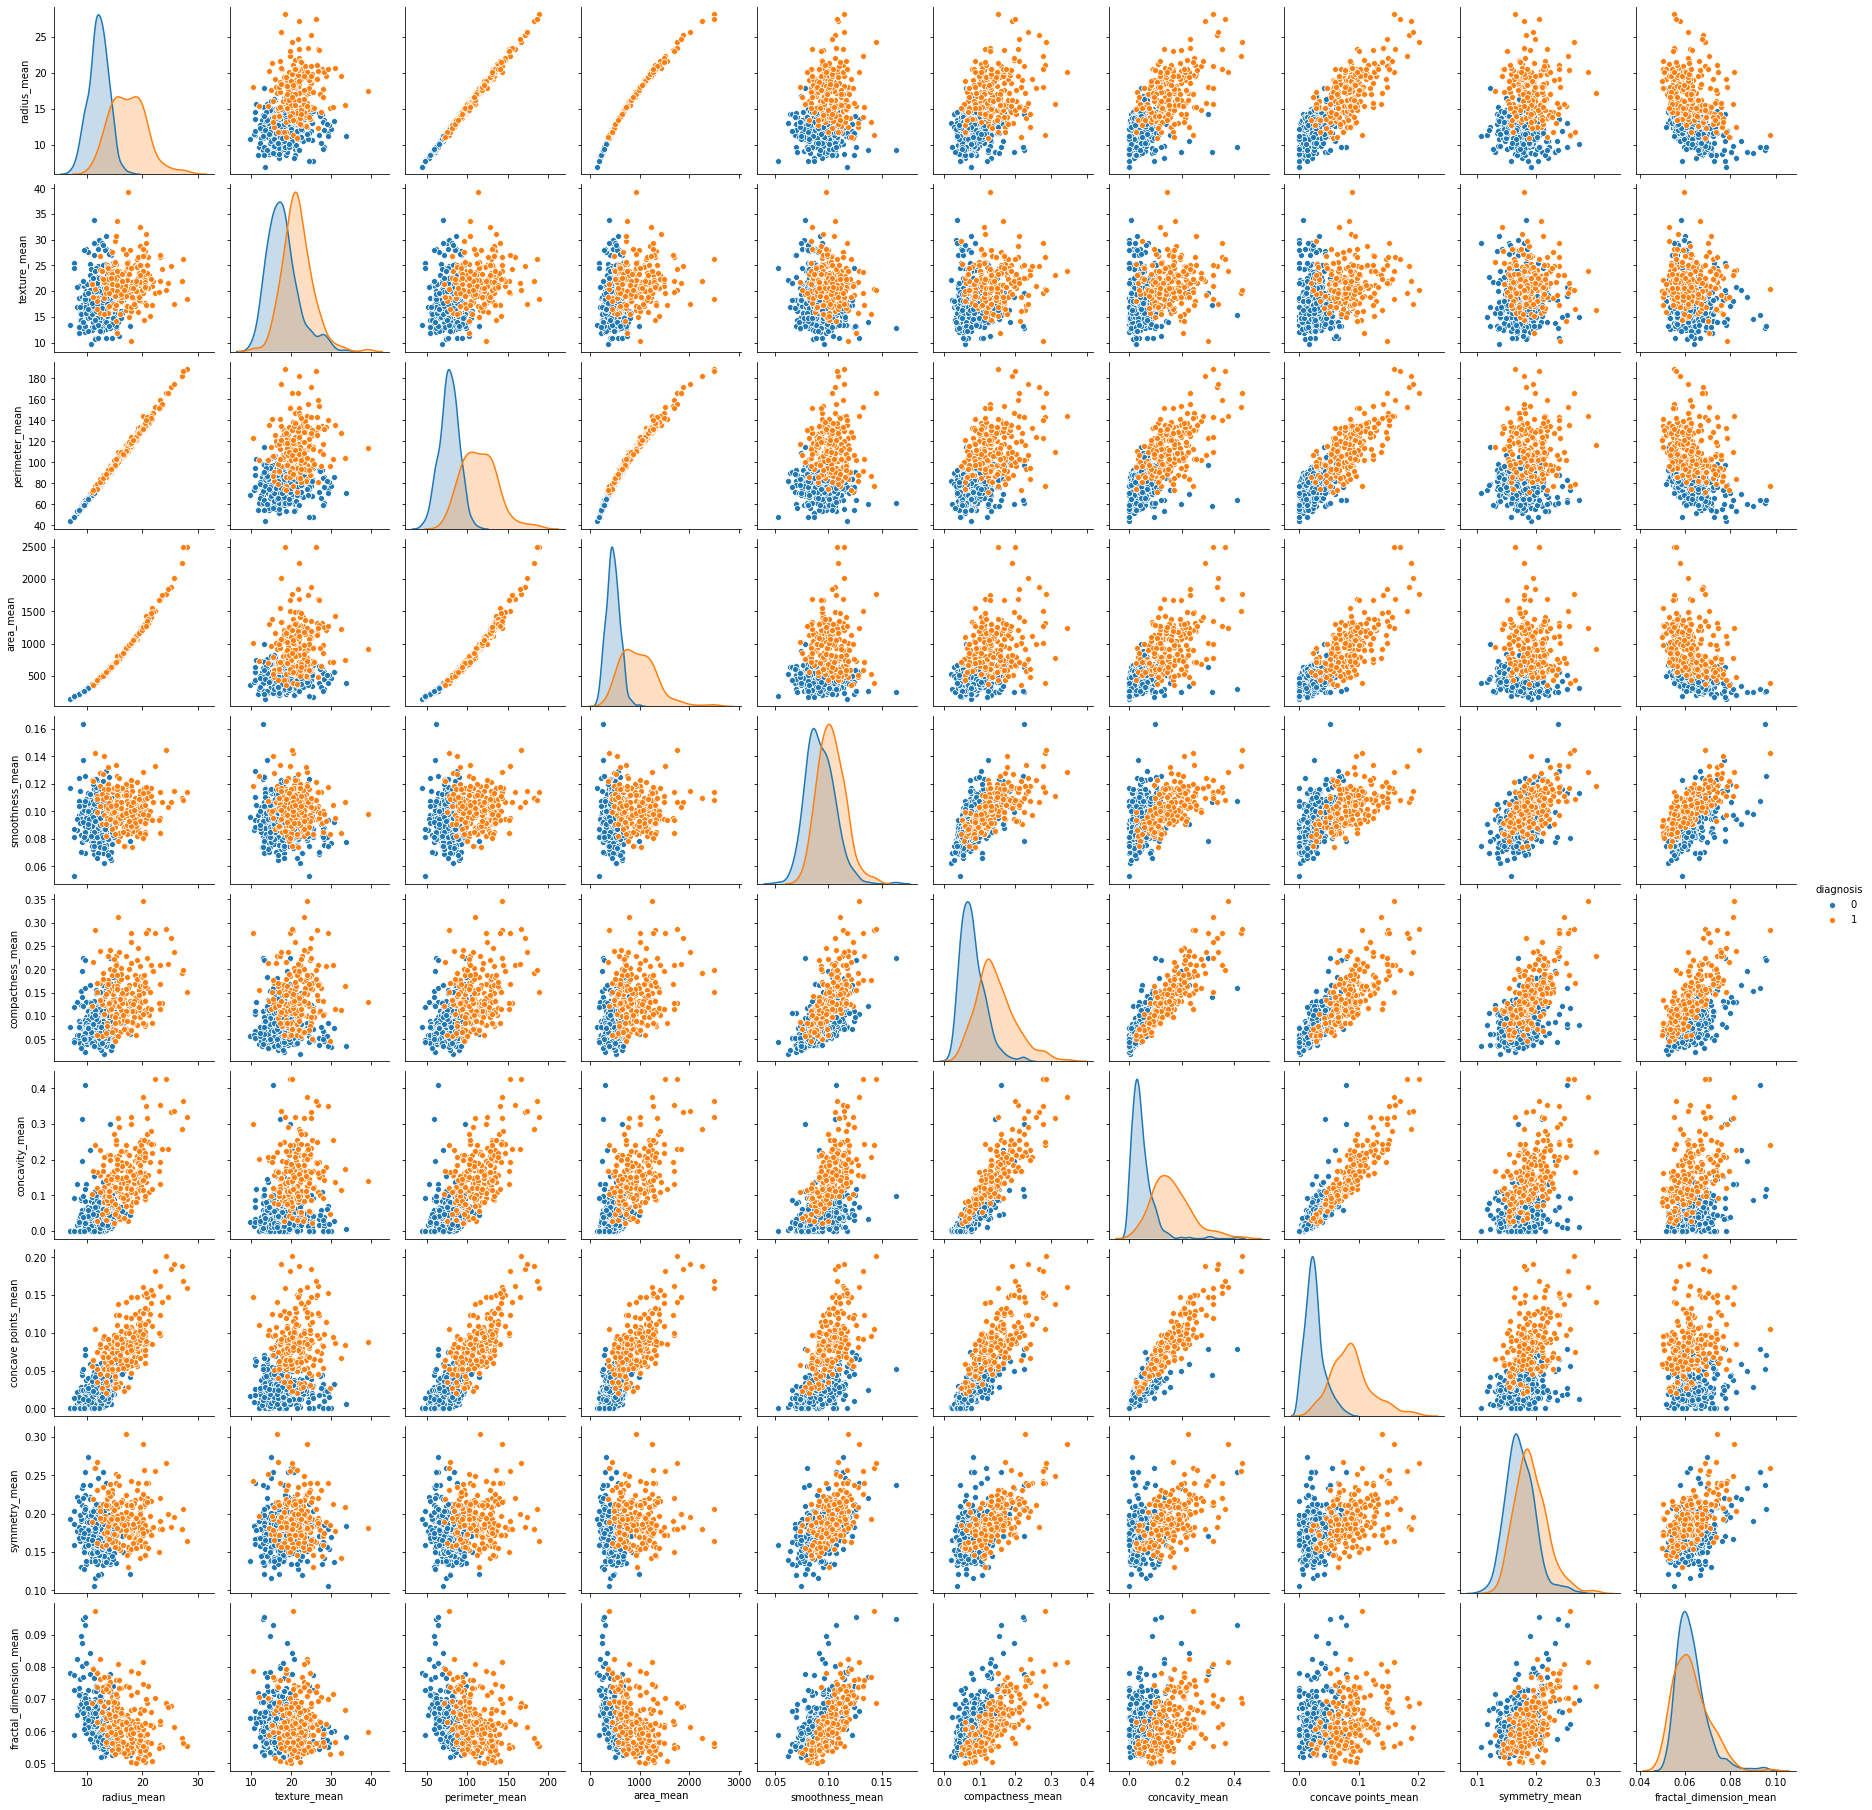

In [17]:
#Pairplot for the mean
sns.pairplot(data_mean, hue = 'diagnosis')

In [18]:
 
def plot_numerical(feature, figsize=None):
    fig = plt.figure(figsize=(10,6))
    
    
    sns.kdeplot(data[data['diagnosis']==0][feature])
    sns.kdeplot(data[data['diagnosis']==1][feature])
  
    fig.legend(labels=['Benign', 'Malignan'])
    plt.title('Diagnosis based on %s'%feature)
    plt.show()
    

    fig.show()

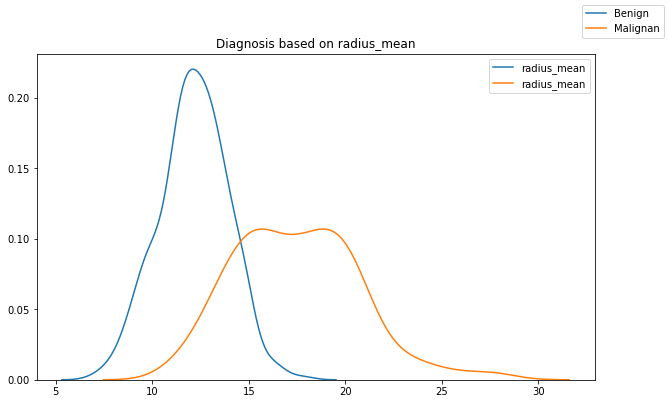

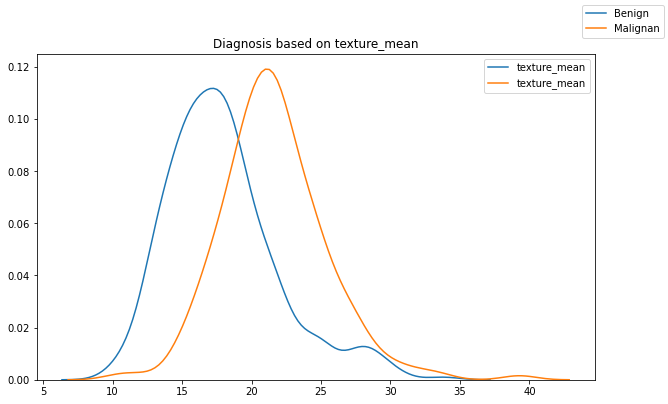

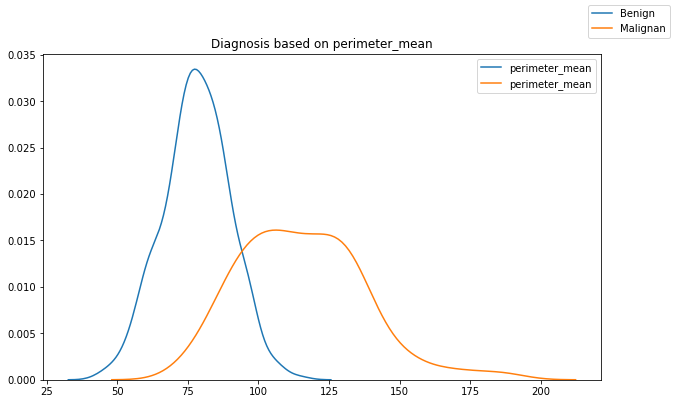

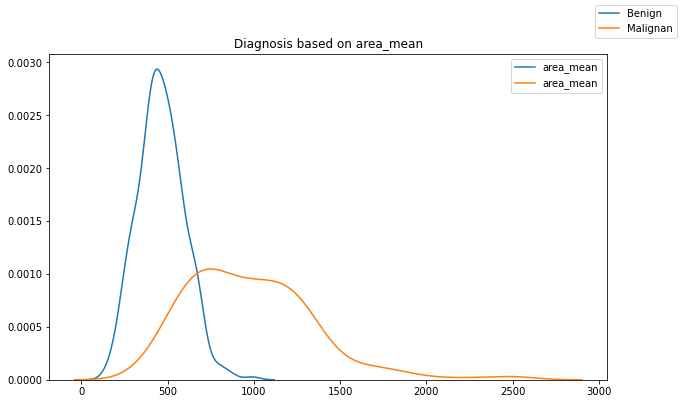

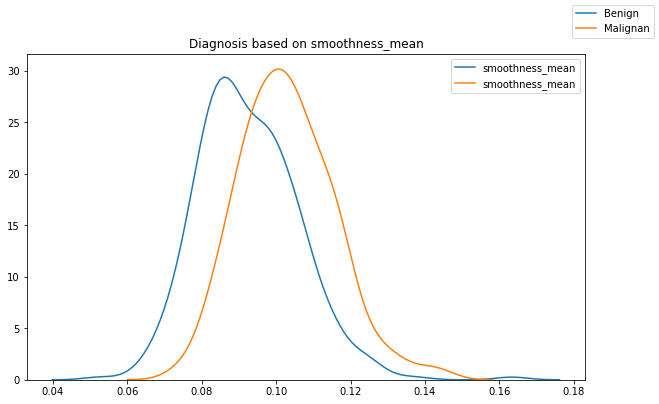

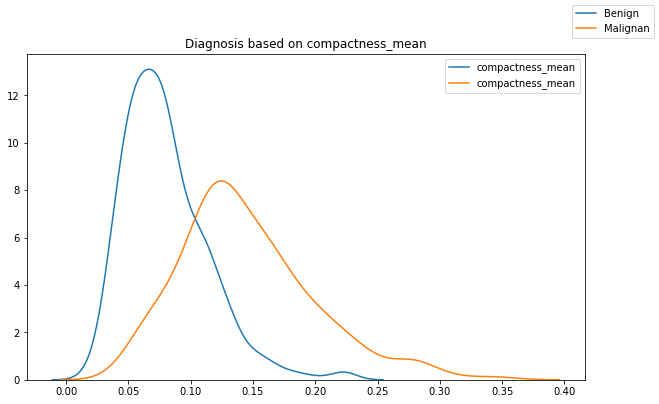

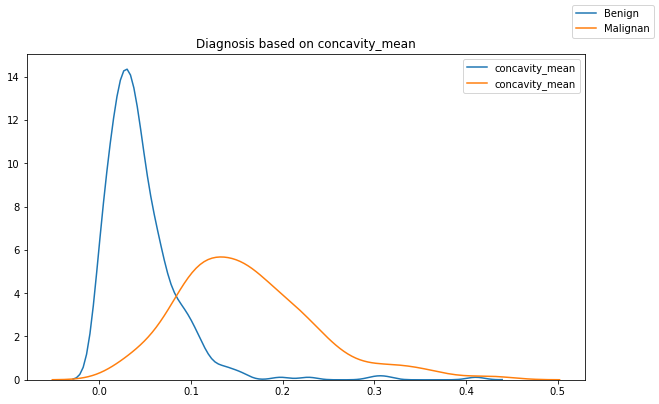

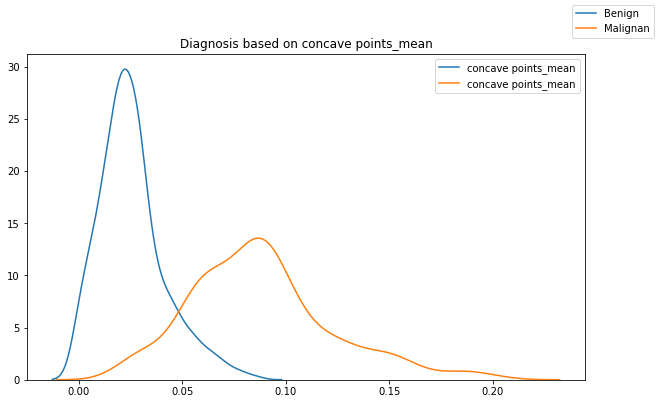

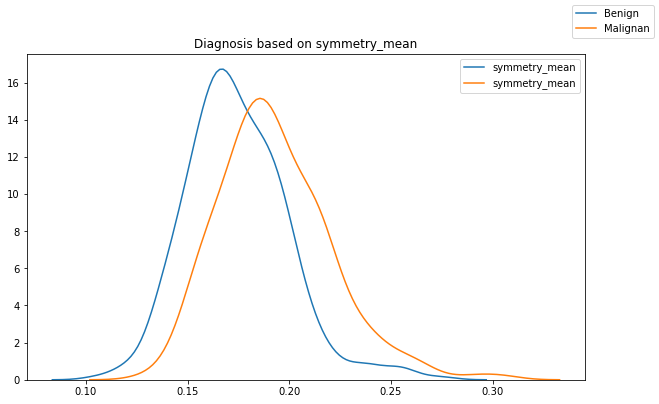

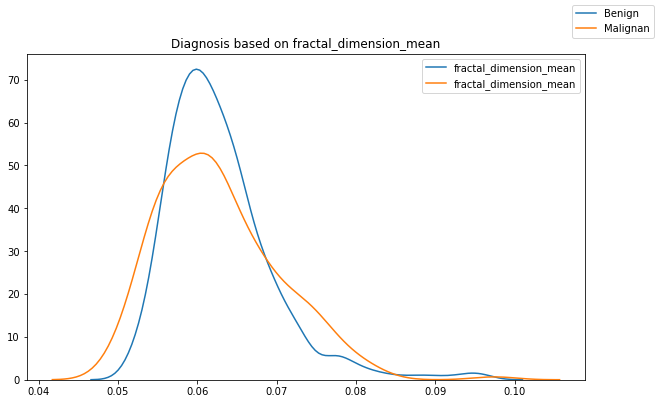

In [19]:
for feature in ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']:
    plot_numerical(feature)

##### SE

In [20]:
data_se = data[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se','diagnosis']]

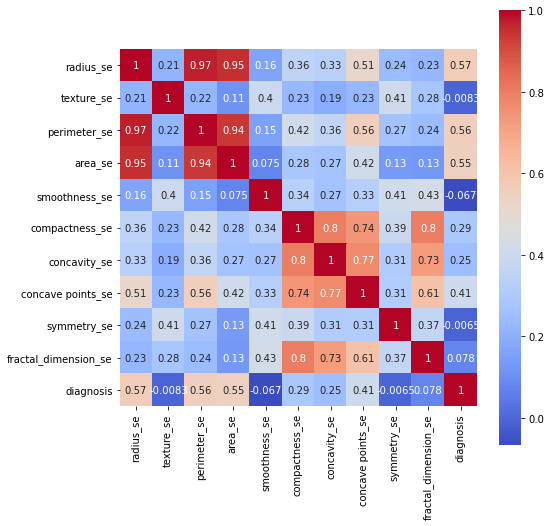

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(data_se.corr(), square="True", annot=True, cmap= "coolwarm")

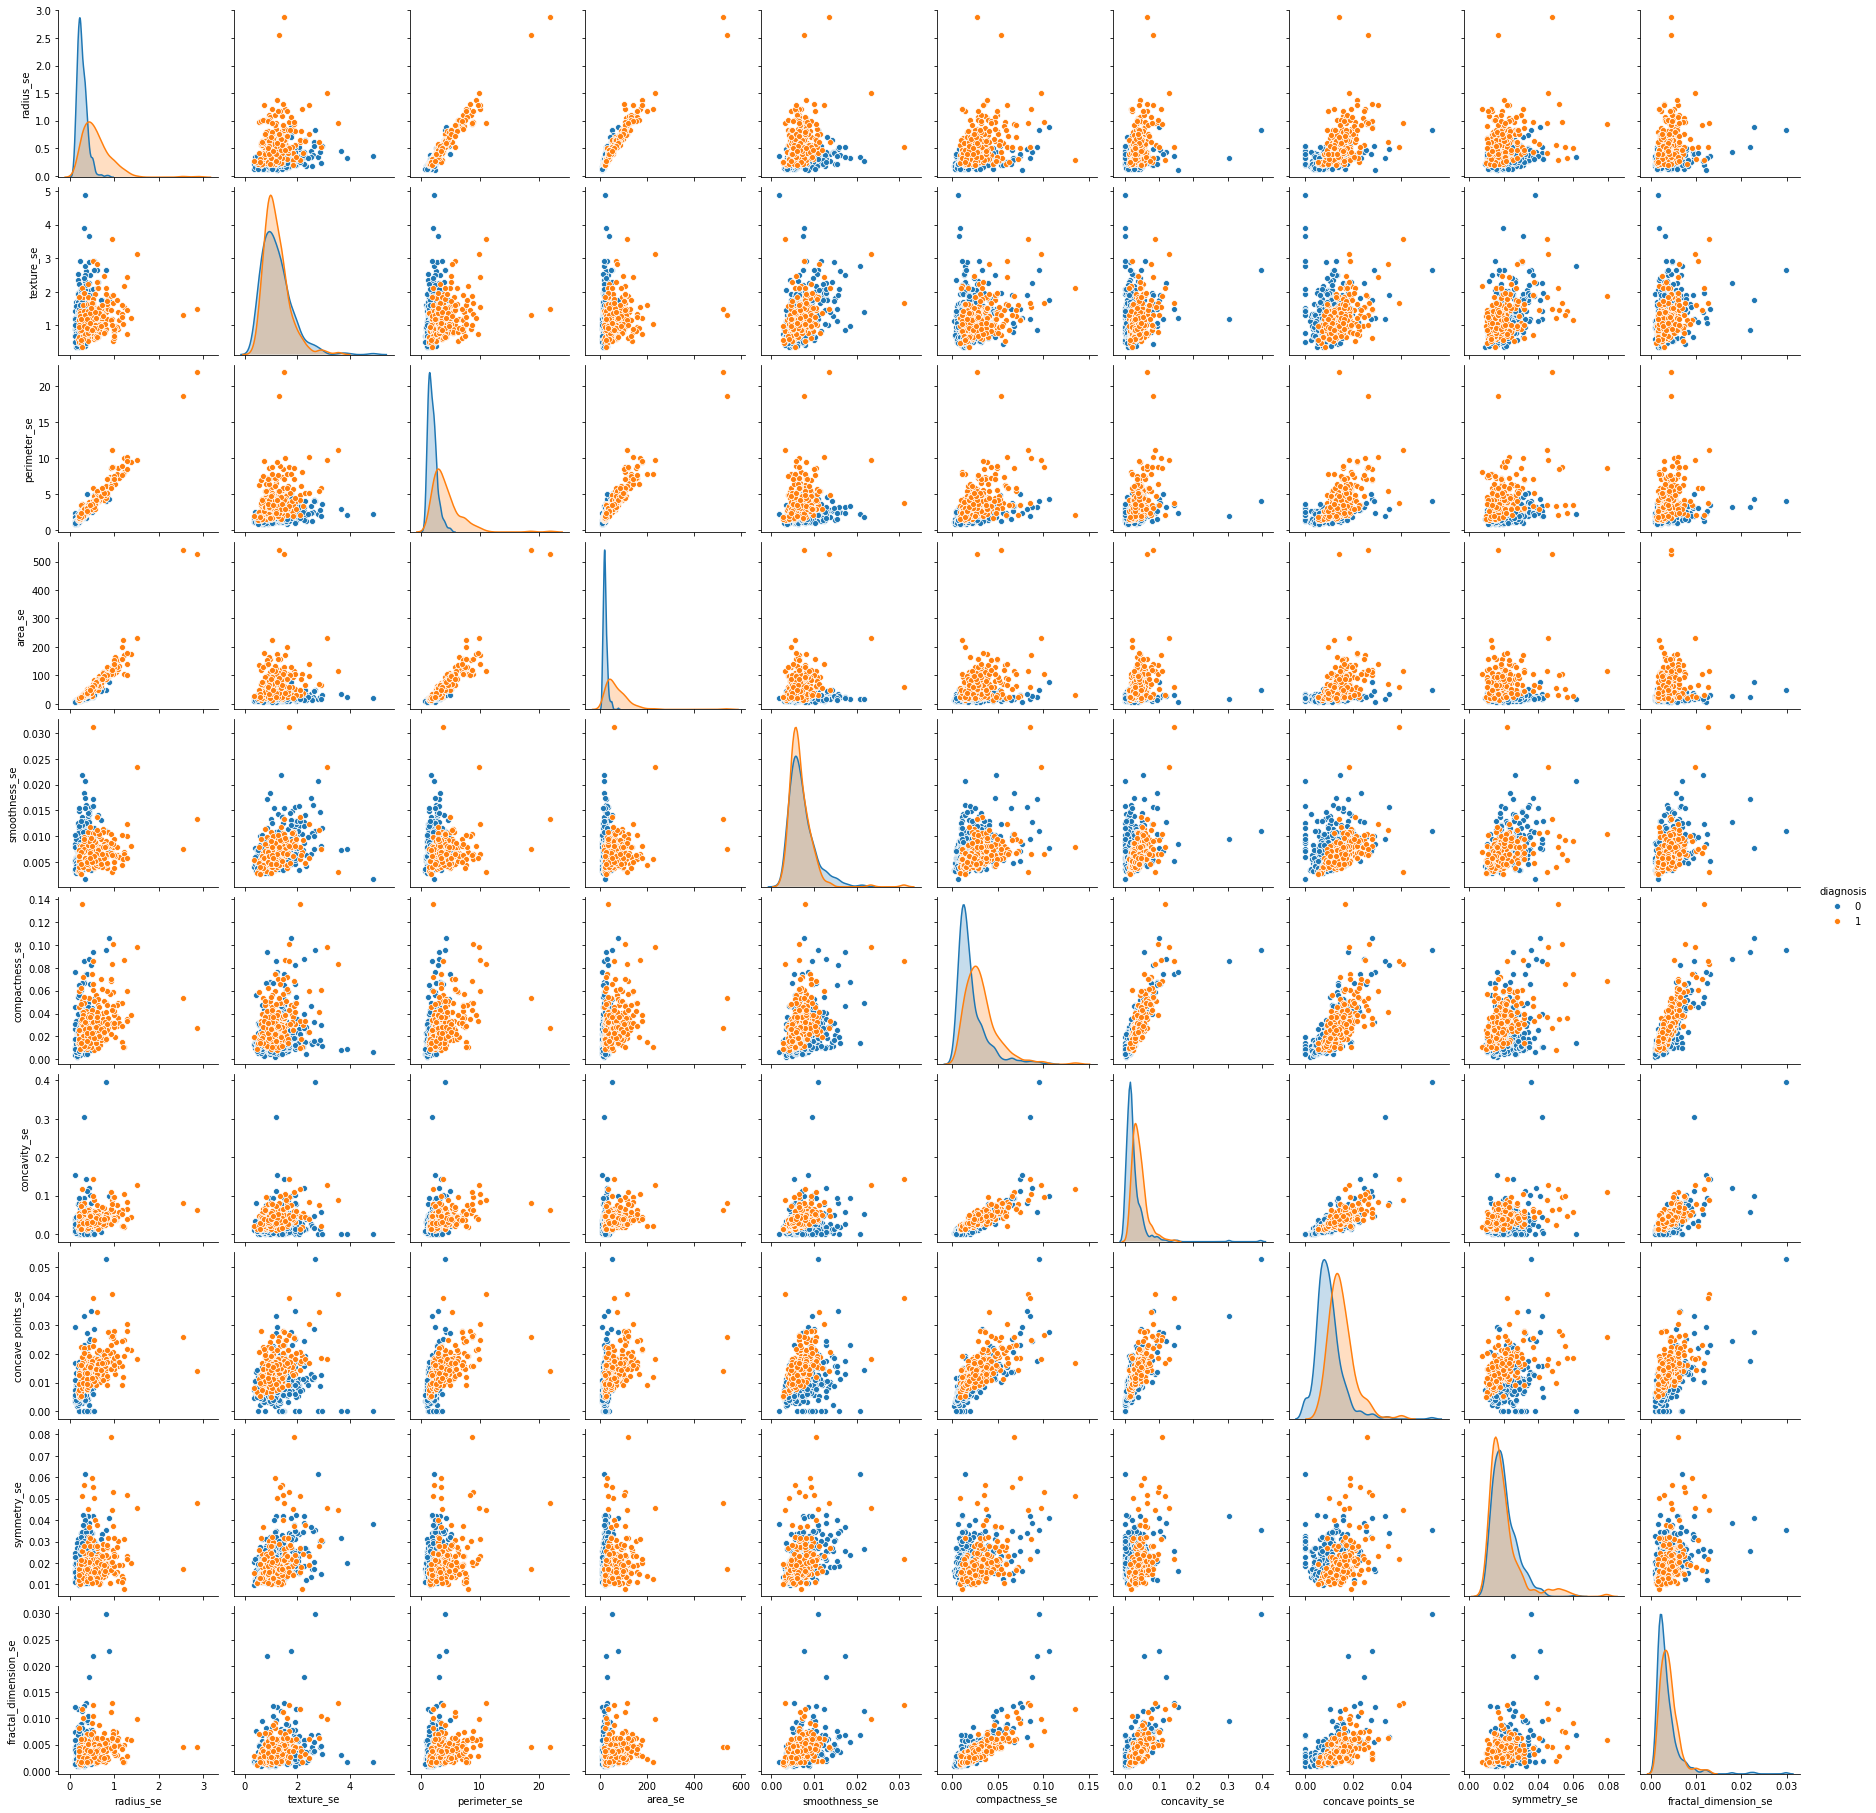

In [22]:
sns.pairplot(data_se, hue='diagnosis')

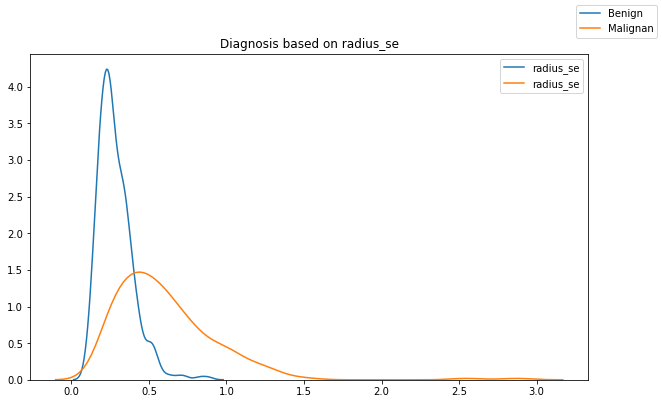

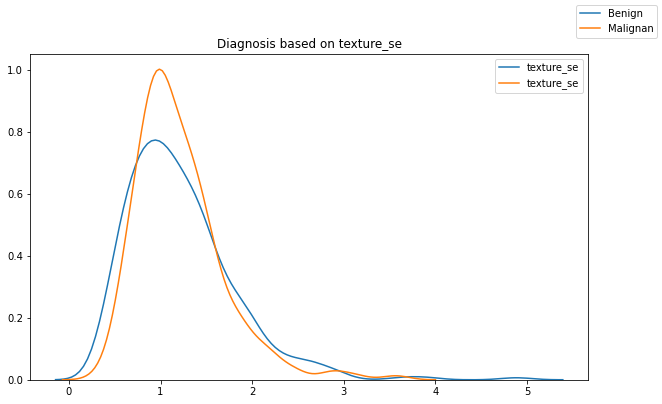

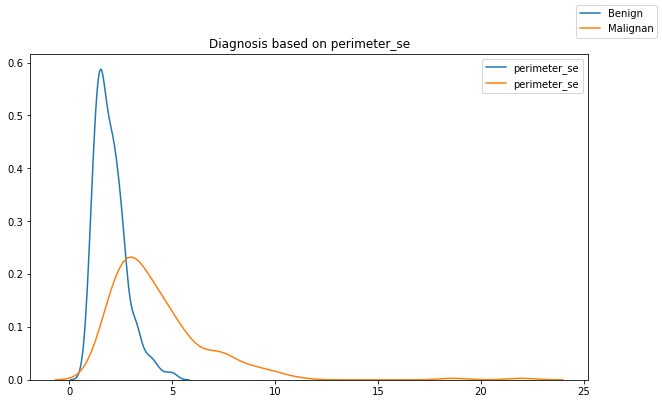

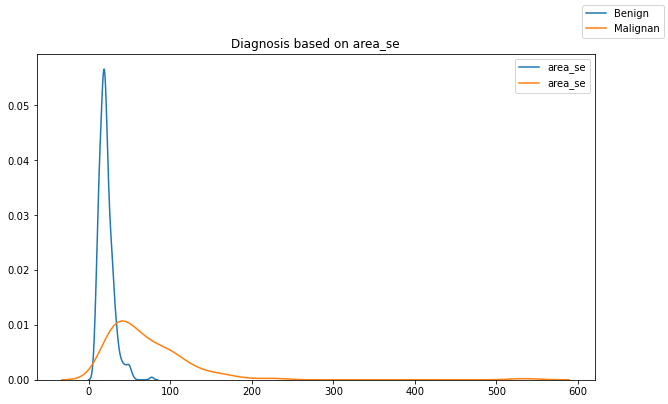

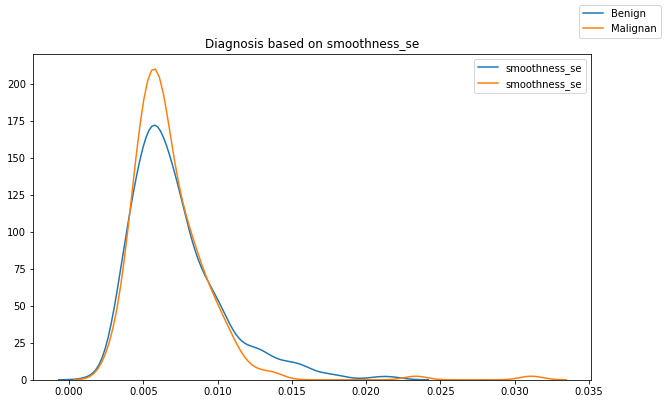

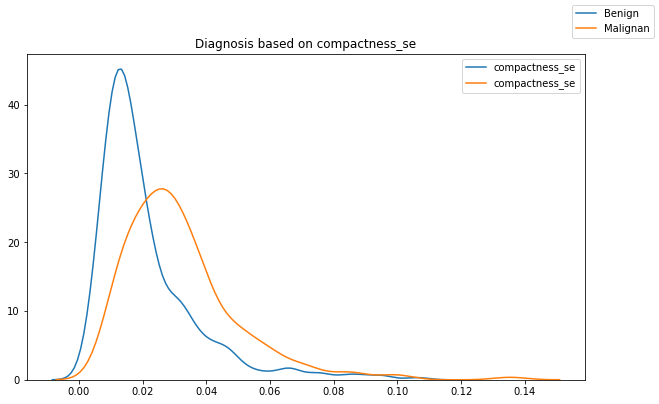

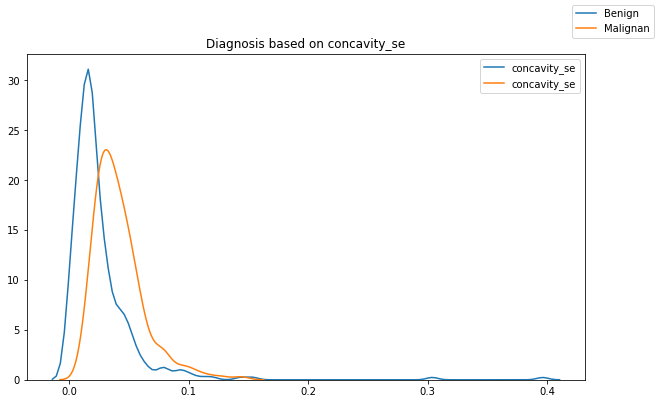

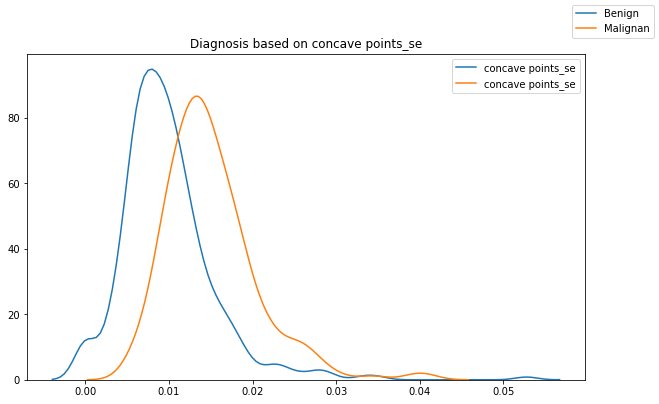

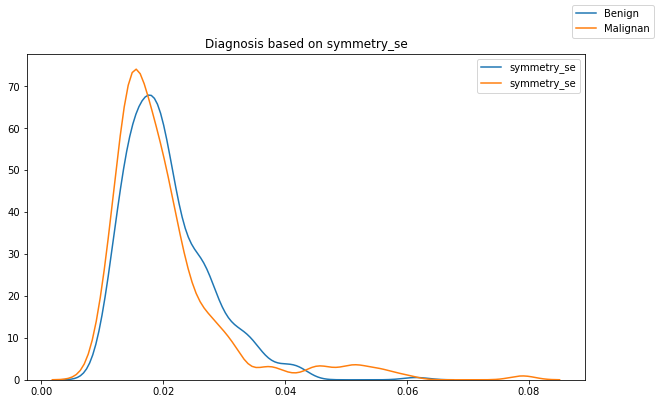

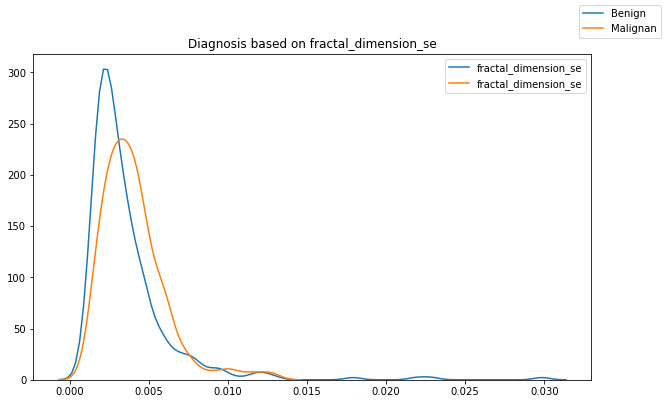

In [23]:
for feature in ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']:
    plot_numerical(feature)

In [24]:
data_worst = data[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst','diagnosis']]

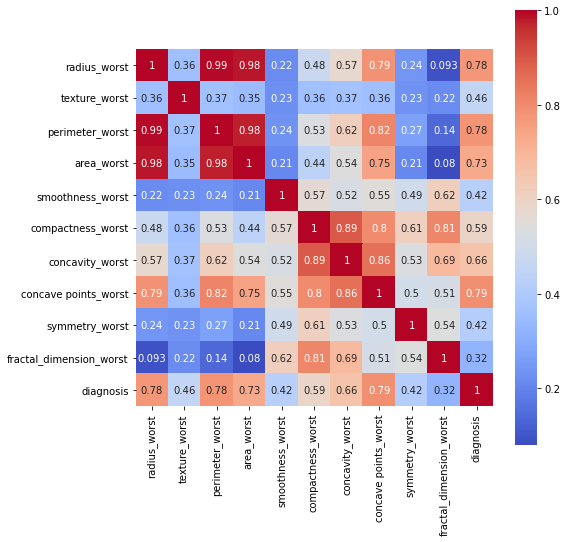

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(data_worst.corr(), square="True", annot=True, cmap= "coolwarm")

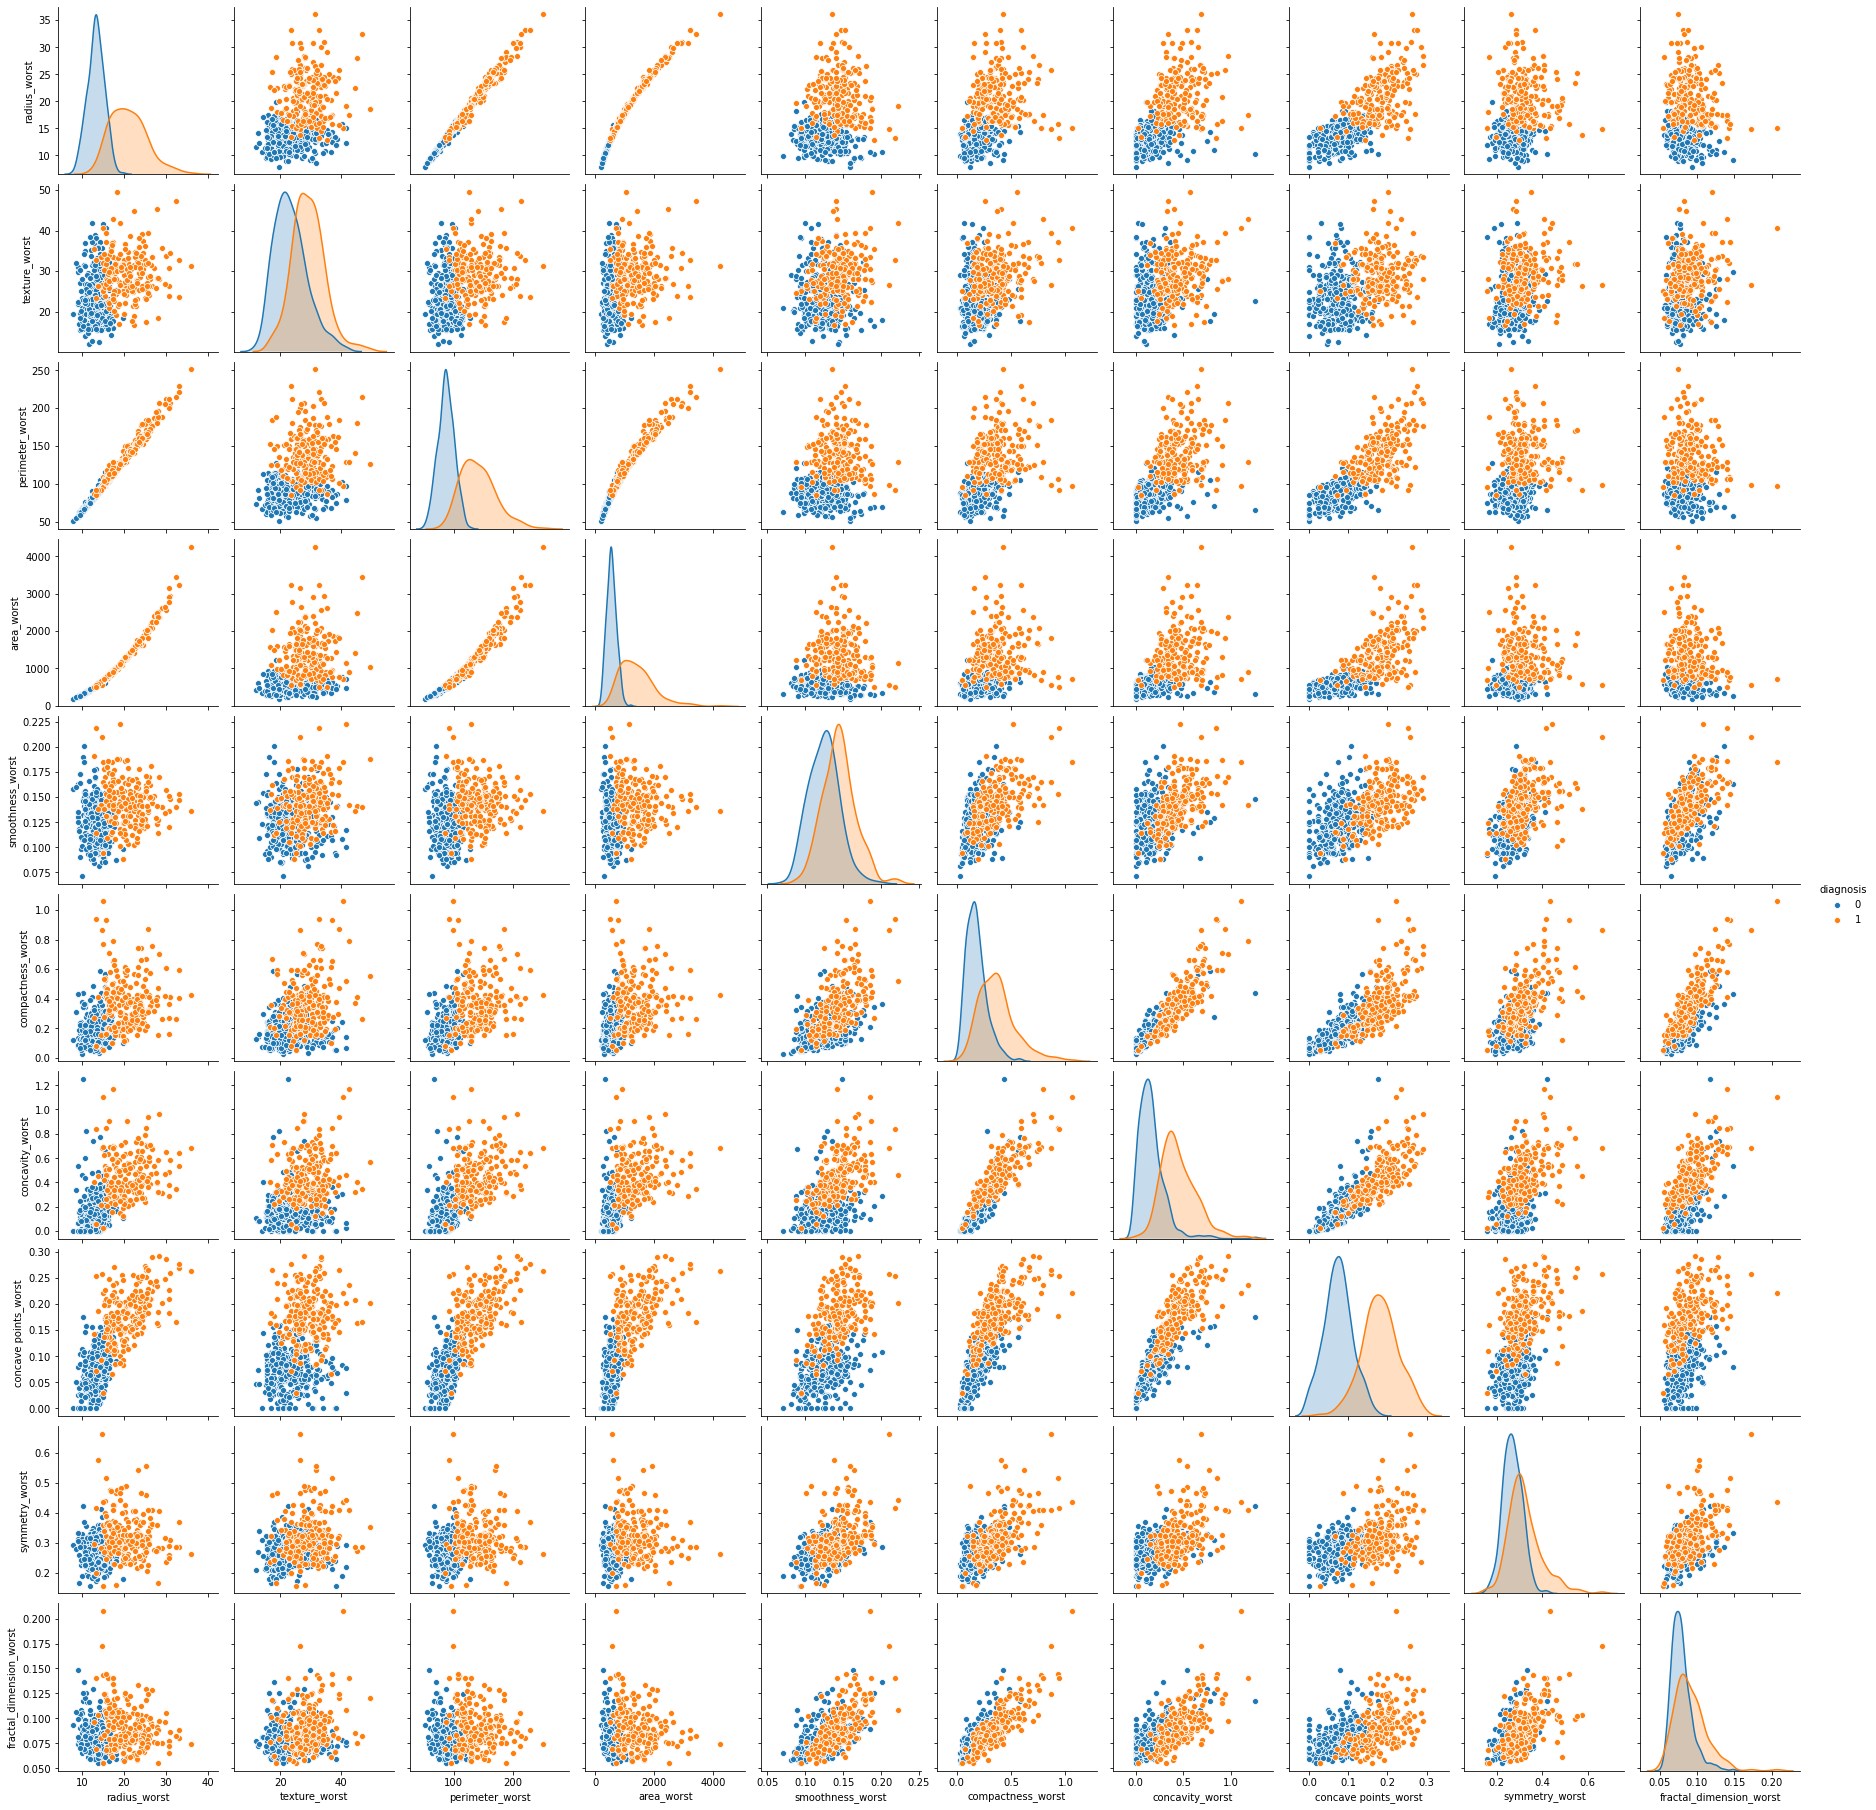

In [26]:
sns.pairplot(data_worst, hue='diagnosis')

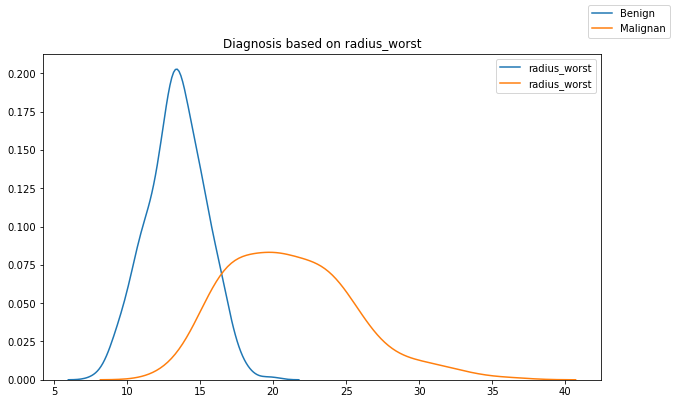

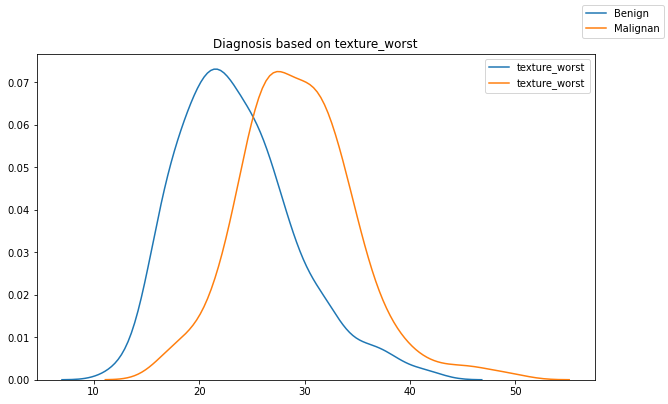

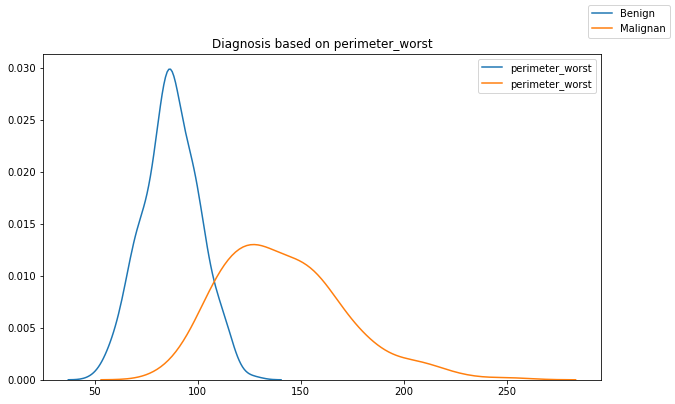

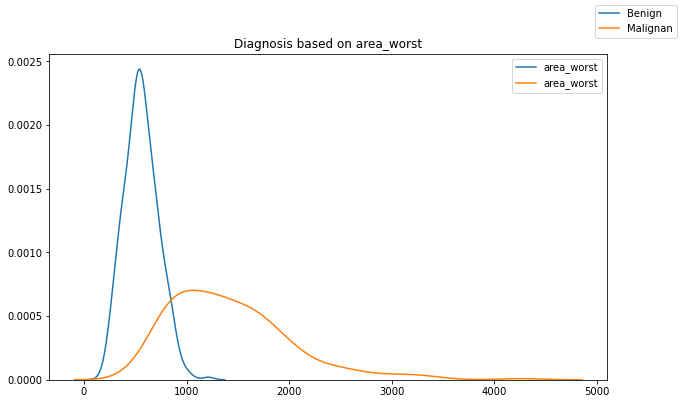

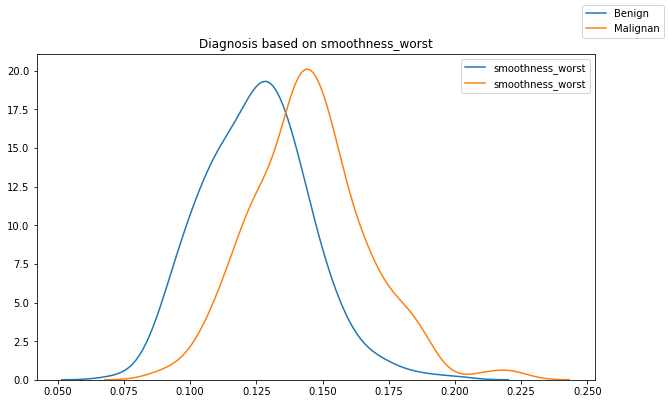

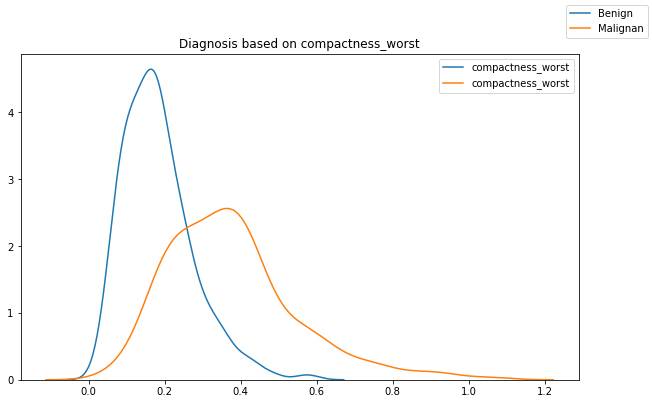

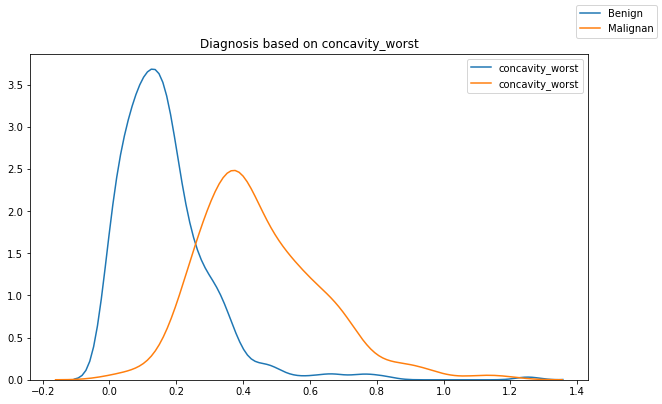

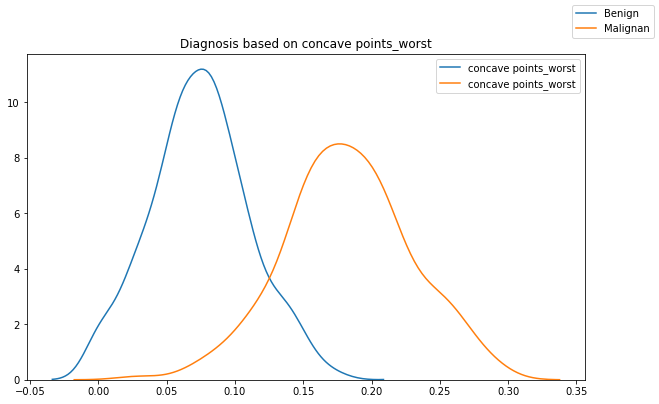

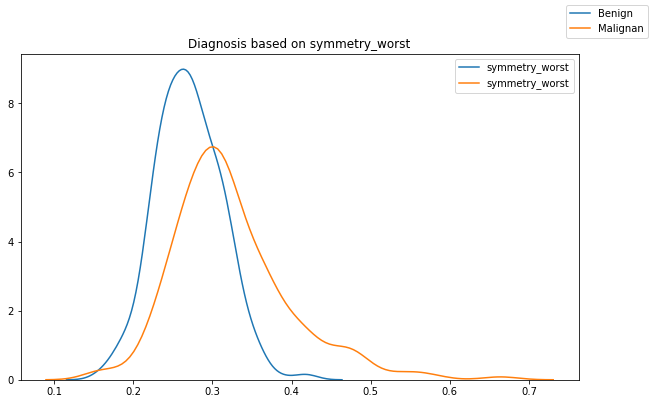

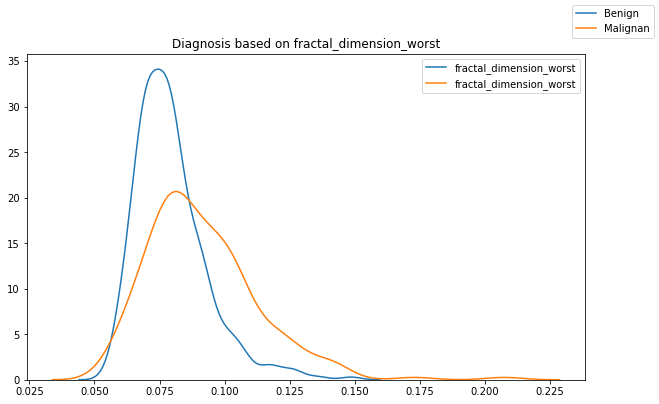

In [27]:
for feature in ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']:
    plot_numerical(feature)

### 4. Pre-Processing Model

#### Training Models

In [28]:
#Define X and y from the data
X = data.drop('diagnosis', axis=1)
y = data.diagnosis

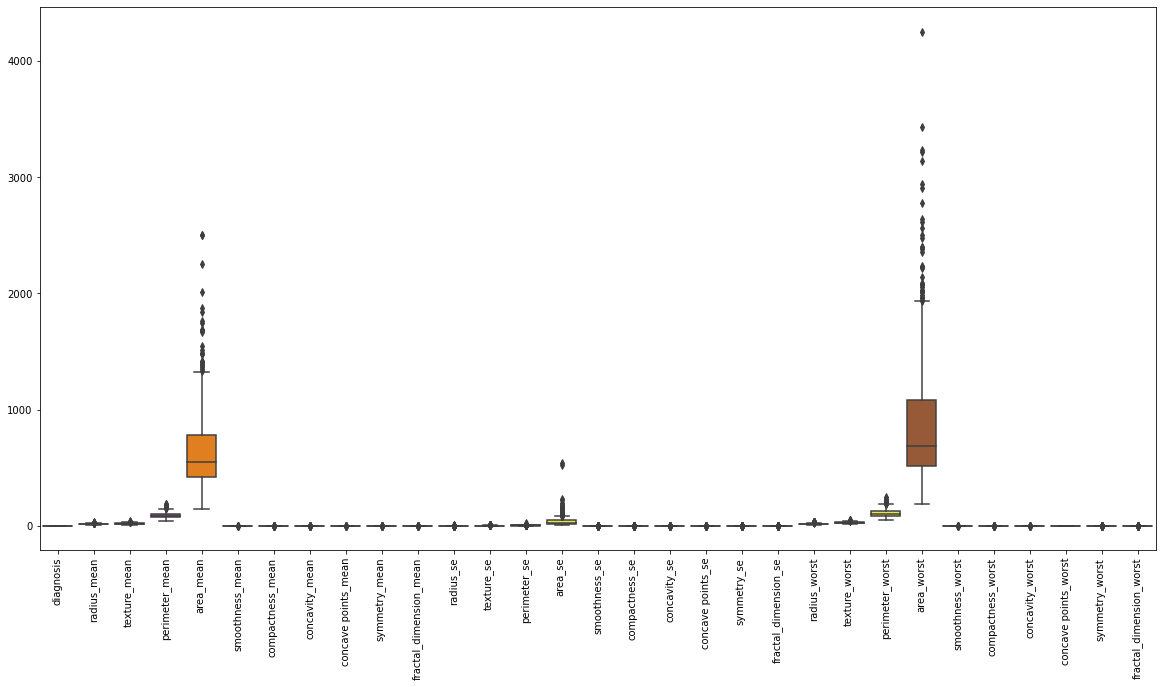

In [29]:
#Checking outliers in the data
plt.figure(figsize=(20,10))
sns.boxplot(data = data,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

The above plot shows the range of our feature attributes. All the features are in different ranges. To fit this in a model we must scale it to the same range.

In [30]:
#scale data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
col_names = list(X.columns)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)

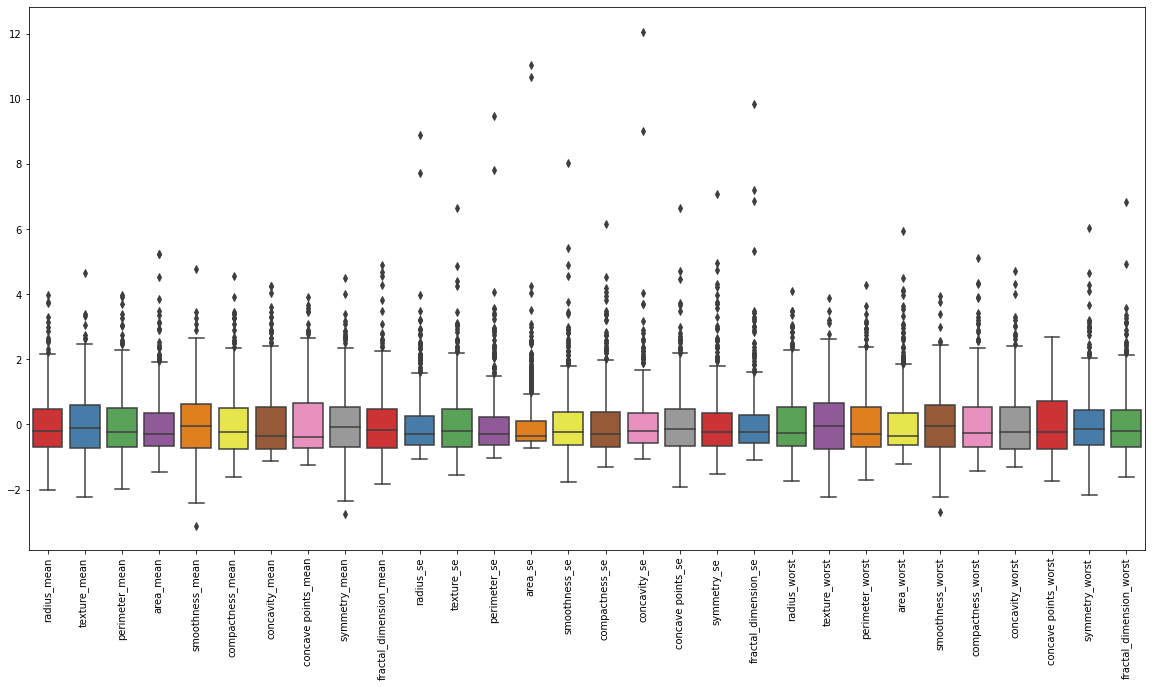

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(data = X_scaled,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [32]:
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

In [33]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [34]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [35]:
#Create a 70/30 train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=1)

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 249 to 37
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              398 non-null    float64
 1   texture_mean             398 non-null    float64
 2   perimeter_mean           398 non-null    float64
 3   area_mean                398 non-null    float64
 4   smoothness_mean          398 non-null    float64
 5   compactness_mean         398 non-null    float64
 6   concavity_mean           398 non-null    float64
 7   concave points_mean      398 non-null    float64
 8   symmetry_mean            398 non-null    float64
 9   fractal_dimension_mean   398 non-null    float64
 10  radius_se                398 non-null    float64
 11  texture_se               398 non-null    float64
 12  perimeter_se             398 non-null    float64
 13  area_se                  398 non-null    float64
 14  smoothness_se            

In [37]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    #print("justmiss", justmiss)
    #print("notmiss", notmiss)
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            #print("I am here 1",r, n,len(d2))
            n = n - 1 
            
        except Exception as e:
            n = n - 1
            #print("I am here e",n)

    if len(d2) == 1:
        #print("I am second step ",r, n)
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        #print(justmiss.count().Y)
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    print(np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT))
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    #print("hi",d3.IV )
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    for i in x:
        print(i)
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                #print("Number and unique value greater than 2")
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                #print("I am here 2")
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [39]:
# importing relevant packages
import os
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import collections
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import traceback
import re
import string
import warnings

In [40]:
import traceback
import sys
final_iv, IV = data_vars(X_train, y_train)

radius_mean
0        -inf
1   -3.378314
2   -2.643494
3   -1.478924
4   -0.458354
5    1.114280
6    2.710731
7         inf
dtype: float64
texture_mean
0   -2.238029
1   -0.681733
2    0.614603
3    1.267278
dtype: float64
perimeter_mean
0        -inf
1   -3.378314
2   -3.357694
3   -1.683718
4   -0.430955
5    1.057122
6    3.265042
7         inf
dtype: float64
area_mean
0        -inf
1   -3.378314
2   -3.357694
3   -1.301783
4   -0.430955
5    0.885070
6    3.265042
7         inf
dtype: float64
smoothness_mean
0   -2.238029
1   -0.872788
2   -0.210412
3    0.023958
4    0.190733
5    0.436546
6    0.727081
7    0.836280
dtype: float64
compactness_mean
0        -inf
1   -2.101453
2   -1.540617
3   -1.151501
4   -0.145739
5    0.108041
6    0.976130
7    1.707429
8    2.840784
dtype: float64
concavity_mean
0        -inf
1   -2.227333
2   -1.987929
3   -0.202113
4    2.104595
5    3.573777
dtype: float64
concave points_mean
0        -inf
1   -3.660881
2   -1.789079
3   -0.392202
4    2.

In [41]:
X_train.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
249    -0.740508     -1.014519       -0.745503  -0.707013         0.351537   
58     -0.305966      0.004736       -0.385500  -0.363161        -1.121587   
476     0.020650      0.288638        0.018164  -0.103779        -0.501736   
529    -0.584300     -1.361252       -0.582390  -0.596377         0.970677   
422    -0.714947     -0.760869       -0.680010  -0.701609         0.885278   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
249         -0.497685       -0.571494            -0.506314       0.260609   
58          -1.259344       -1.106185            -1.154336       0.026949   
476          0.122408       -0.479215            -0.473040      -1.115796   
529         -0.270077       -0.640169            -0.540104      -0.564504   
422          0.236117       -0.223847            -0.101864       0.271562   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
249               -0.158433  ...     -0.749471      -0.730716   
58                -1.103975  ...     -0.422281      -0.558102   
476               -0.383832  ...      0.037443       0.257745   
529                0.465313  ...     -0.583805      -1.613330   
422                0.057043  ...     -0.751542      -0.978239   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
249        -0.785787   -0.683447          0.286310          -0.611108   
58         -0.506991   -0.450875         -1.326851          -1.223647   
476         0.144127   -0.091558         -0.748217           0.563842   
529        -0.605880   -0.581312          0.864944          -0.579301   
422        -0.754511   -0.711749          0.400283          -0.237058   

     concavity_worst  concave points_worst  symmetry_worst  \
249        -0.440357             -0.282091       -0.383019   
58         -1.296979             -1.575895       -0.747019   
476        -0.100693              0.293779       -0.593330   
529        -0.527672             -0.619360       -0.193738   
422        -0.201441             -0.062524       -0.184032   

     fractal_dimension_worst  
249                -0.324505  
58                 -1.166825  
476                -0.297351  
529                -0.189844  
422                -0.536193  

[5 rows x 30 columns]

In [42]:
final_iv

VAR_NAME  MIN_VALUE  MAX_VALUE  COUNT  EVENT  EVENT_RATE  \
0                radius_mean  -2.029648  -1.033042     50      0    0.000000   
1                radius_mean  -1.027362  -0.712106     50      1    0.020000   
2                radius_mean  -0.709266  -0.476375     49      2    0.040816   
3                radius_mean  -0.473535  -0.240643     50      6    0.120000   
4                radius_mean  -0.234963   0.037691     51     14    0.274510   
..                       ...        ...        ...    ...    ...         ...   
164           symmetry_worst   0.802814   4.298838     57     46    0.807018   
165  fractal_dimension_worst  -1.592419  -0.650904    100     20    0.200000   
166  fractal_dimension_worst  -0.646471  -0.207578     99     31    0.313131   
167  fractal_dimension_worst  -0.206469   0.451317     99     37    0.373737   
168  fractal_dimension_worst   0.454641   3.582864    100     61    0.610000   

     NONEVENT  NON_EVENT_RATE  DIST_EVENT  DIST_NON_EVENT       WOE        IV  
0          50        1.000000    0.000000        0.200803  0.000000  2.252449  
1          49        0.980000    0.006711        0.196787 -3.378314  2.252449  
2          47        0.959184    0.013423        0.188755 -2.643494  2.252449  
3          44        0.880000    0.040268        0.176707 -1.478924  2.252449  
4          37        0.725490    0.093960        0.148594 -0.458354  2.252449  
..        ...             ...         ...             ...       ...       ...  
164        11        0.192982    0.308725        0.044177  1.944253  0.884943  
165        80        0.800000    0.134228        0.321285 -0.872788  0.423820  
166        68        0.686869    0.208054        0.273092 -0.272014  0.423820  
167        62        0.626263    0.248322        0.248996 -0.002710  0.423820  
168        39        0.390000    0.409396        0.156627  0.960819  0.423820  

[169 rows x 12 columns]

In [43]:
IV

VAR_NAME        IV
0                 area_mean  2.544076
1                   area_se  2.266907
2                area_worst  4.693787
3          compactness_mean  1.769842
4            compactness_se  0.772269
5         compactness_worst  2.356077
6       concave points_mean  2.064828
7         concave points_se  1.359564
8      concave points_worst  2.517558
9            concavity_mean  3.083534
10             concavity_se  1.555062
11          concavity_worst  3.814644
12   fractal_dimension_mean  0.002878
13     fractal_dimension_se  0.161729
14  fractal_dimension_worst  0.423820
15           perimeter_mean  2.670561
16             perimeter_se  2.666519
17          perimeter_worst  4.693787
18              radius_mean  2.252449
19                radius_se  1.822945
20             radius_worst  4.676405
21          smoothness_mean  0.652739
22            smoothness_se  0.051008
23         smoothness_worst  0.854224
24            symmetry_mean  0.404153
25              symmetry_se  0.078111
26           symmetry_worst  0.884943
27             texture_mean  1.371577
28               texture_se  0.000115
29            texture_worst  1.432811

In [44]:
#features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
display(X2.shape)
X2.head()

(398, 7)

compactness_se  fractal_dimension_se  fractal_dimension_worst  \
249       -0.737638             -0.382376                -0.324505   
58        -0.943703             -0.304456                -1.166825   
476        0.413687             -0.397506                -0.297351   
529       -0.779555             -0.590414                -0.189844   
422       -0.303376             -0.685733                -0.536193   

     smoothness_mean  smoothness_se  symmetry_mean  symmetry_se  
249         0.351537      -0.126331       0.260609    -0.456744  
58         -1.121587       0.150013       0.026949     0.164388  
476        -0.501736      -0.978033      -1.115796    -0.537867  
529         0.970677       0.095344      -0.564504    -0.111671  
422         0.885278      -0.385675       0.271562    -0.249700

In [45]:
display(X2.shape[1])
for i in range(X2.shape[1]):
    print((i, variance_inflation_factor(X2.values, i) ))
    #print(variance_inflation_factor(X2.values, i) )

7

(0, 3.0868696340477566)
(1, 3.4735372472130357)
(2, 2.3391861484700094)
(3, 1.9170592081300493)
(4, 1.6671758939247243)
(5, 1.9261698275387005)
(6, 1.7812083391918967)


In [46]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
    count = 0
    while max_vif > vif_threshold:
        count += 1
        print("Iteration # "+str(count))
        vif = pd.DataFrame()
        vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["features"] = df.columns
        
        if vif['VIFactor'].max() > vif_threshold:
            print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max()))
            df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
            max_vif = vif['VIFactor'].max()
        else:
            print('Complete')
            return df, vif.sort_values('VIFactor')  

X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1
Complete


In [47]:
X_train=final_df
display(len(X_train.columns))
display(X_train.columns)
X_train.head()

7

Index(['compactness_se', 'fractal_dimension_se', 'fractal_dimension_worst',
       'smoothness_mean', 'smoothness_se', 'symmetry_mean', 'symmetry_se'],
      dtype='object')

compactness_se  fractal_dimension_se  fractal_dimension_worst  \
249       -0.737638             -0.382376                -0.324505   
58        -0.943703             -0.304456                -1.166825   
476        0.413687             -0.397506                -0.297351   
529       -0.779555             -0.590414                -0.189844   
422       -0.303376             -0.685733                -0.536193   

     smoothness_mean  smoothness_se  symmetry_mean  symmetry_se  
249         0.351537      -0.126331       0.260609    -0.456744  
58         -1.121587       0.150013       0.026949     0.164388  
476        -0.501736      -0.978033      -1.115796    -0.537867  
529         0.970677       0.095344      -0.564504    -0.111671  
422         0.885278      -0.385675       0.271562    -0.249700

In [48]:
X_test=X_test[final_df.columns]

In [49]:
X_test.head()

compactness_se  fractal_dimension_se  fractal_dimension_worst  \
421        1.506886              0.623773                 0.450762   
47        -0.118382             -0.057458                 1.881599   
292       -0.304494              0.352188                 0.659126   
186       -0.910840             -1.024268                -0.807177   
414       -0.626418             -0.773488                -1.235541   

     smoothness_mean  smoothness_se  symmetry_mean  symmetry_se  
421         0.479635       0.978380       1.001751     0.724982  
47          1.383436      -0.169667       1.155090    -0.376832  
292         0.294605       0.561363      -0.297985     0.691080  
186        -0.745834      -1.391716      -0.695938    -1.192902  
414        -0.936557      -0.069996       0.147430     1.327953

### 5. Modeling

### A. Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train, y_train)

print(model_res)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
clf_probs = y_pred_prob[:,1]

#Model evaluation
f1 = f1_score(y_test, y_pred, average='weighted')
ac = accuracy_score(y_test, y_pred, normalize=True)
recall = recall_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")

print("********* Random Forest Results *********")
print('Random Forest: Accuracy = %.3f' % (ac))
print('Random Forest: F1 Score = %.3f' % (f1))
print('Random Forest: Recall = %.3f' % (recall))
print('Random Forest: Precision = %.3f' % (precision))

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=1)
********* Random Forest Results *********
Random Forest: Accuracy = 0.789
Random Forest: F1 Score = 0.783
Random Forest: Recall = 0.789
Random Forest: Precision = 0.788


#### Classification Report

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       108
           1       0.78      0.60      0.68        63

    accuracy                           0.79       171
   macro avg       0.79      0.75      0.76       171
weighted avg       0.79      0.79      0.78       171



#### Confusion Matrix

In [52]:
print(confusion_matrix(y_test, y_pred))

[[97 11]
 [25 38]]


#### Find the best paramaters using GridSearchCV

In [53]:
#Grid Search for RainForest Classifier
parameters = {
    'n_estimators' : [100,150,200,300,400,500],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,12,14,16],
    'criterion' : ['gini', 'entropy'],
    'n_jobs' : [-1,1,None]
}

clf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)

# Model and fit
model= clf_cv.fit(X_train, y_train)
y_pred_cv = model.predict(X_test)

In [54]:
#Best score and best parameter for n_neighbors
print("Best Score:" + str(clf_cv.best_score_))
print("Best Parameters: " + str(clf_cv.best_params_))

Best Score:0.7864240506329114
Best Parameters: {'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2', 'n_estimators': 150, 'n_jobs': -1}


In [55]:
#Fit and score the best number of neighbors
RF_model = RandomForestClassifier(n_estimators=200, criterion="gini", max_depth =12, max_features ='log2',n_jobs=-1)
RF_model.fit(X_train, y_train)
predictions = RF_model.predict(X_test)

In [56]:
#Model evaluation
f1 = f1_score(y_test, predictions, average='weighted')
ac = accuracy_score(y_test, predictions, normalize=True)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
roc1 = roc_auc_score(y_test, predictions)

print("********* Random Forest with GridSearch Results *********")
print('Random Forest: Accuracy = %.3f' % (ac))
print('Random Forest: F1 Score = %.3f' % (f1))
print('Random Forest: Recall = %.3f' % (recall))
print('Random Forest: Precision = %.3f' % (precision))
print('Random Forest: roc_auc = %.3f' % (roc1))

********* Random Forest with GridSearch Results *********
Random Forest: Accuracy = 0.789
Random Forest: F1 Score = 0.784
Random Forest: Recall = 0.789
Random Forest: Precision = 0.787
Random Forest: roc_auc = 0.754


#### Classification Report

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       108
           1       0.78      0.60      0.68        63

    accuracy                           0.79       171
   macro avg       0.79      0.75      0.76       171
weighted avg       0.79      0.79      0.78       171



#### Confusion Matrix

In [58]:
print(confusion_matrix(y_test,y_pred))

[[97 11]
 [25 38]]


### Plot feature importances
The random forest algorithm can be used as a regression or classification model. In either case it tends to be a bit of a black box, where understanding what's happening under the hood can be difficult. Plotting the feature importances is one way that you can gain a perspective on which features are driving the model predictions.

7


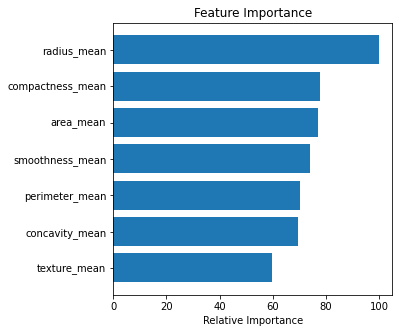

In [59]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(5,5))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
conda install -c conda-forge shap

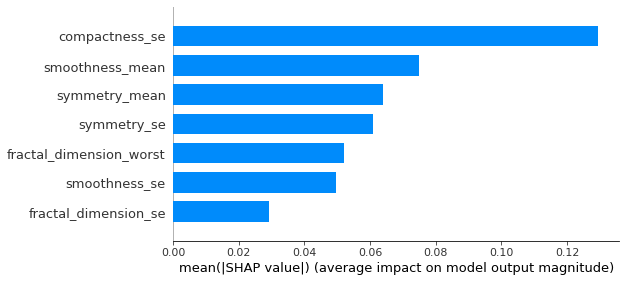

In [94]:
import shap
shap_values = shap.TreeExplainer(RF_model).shap_values(X_train)
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

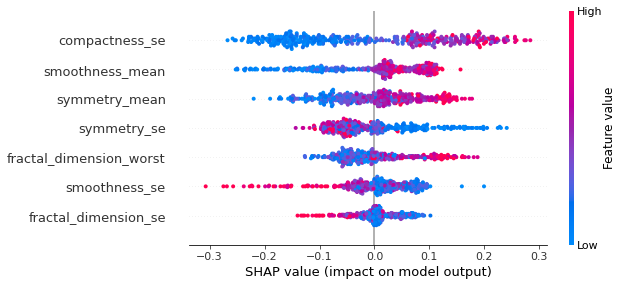

In [95]:
import shap
shap_values = shap.TreeExplainer(RF_model).shap_values(X_train)
shap.summary_plot(shap_values[1],X_train)

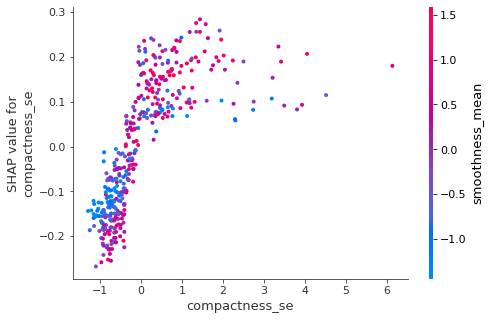

In [96]:
shap.dependence_plot("compactness_se", shap_values[1], X_train)

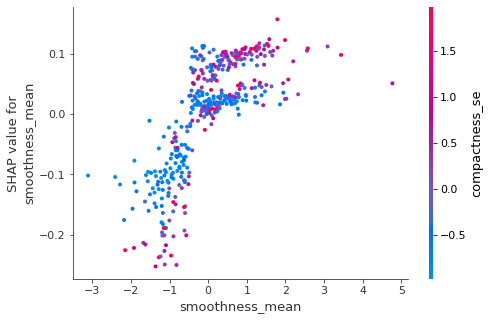

In [98]:
shap.dependence_plot("smoothness_mean", shap_values[1], X_train)

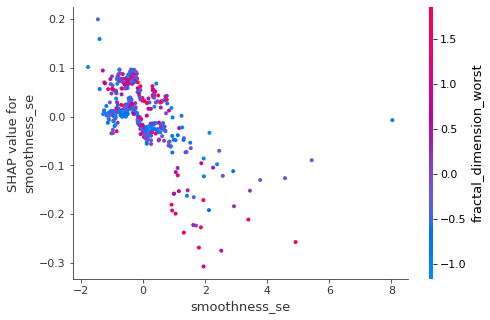

In [99]:
shap.dependence_plot("smoothness_se", shap_values[1], X_train)

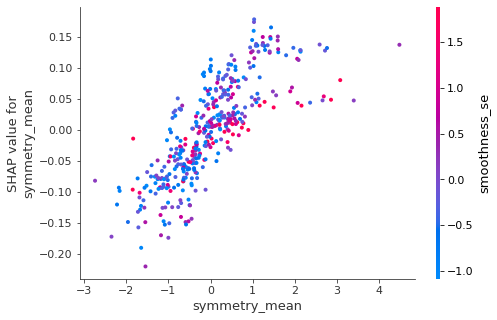

In [100]:
shap.dependence_plot("symmetry_mean", shap_values[1], X_train)

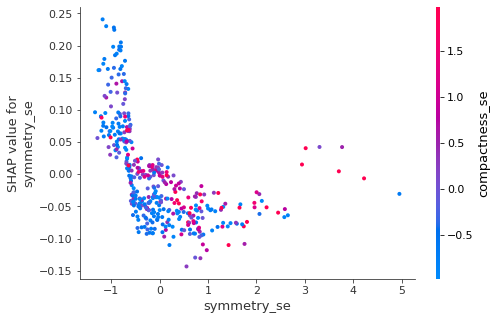

In [102]:
shap.dependence_plot("symmetry_se", shap_values[1], X_train)

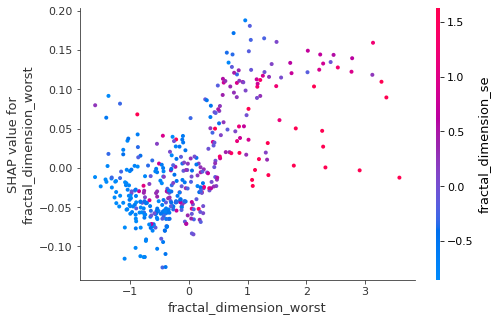

In [103]:
shap.dependence_plot("fractal_dimension_worst", shap_values[1], X_train)

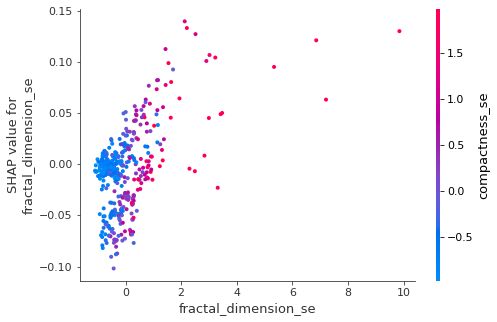

In [104]:
shap.dependence_plot("fractal_dimension_se", shap_values[0], X_train)

### B. Linear Regression

In [105]:
lr = LogisticRegression(max_iter=1000)
model_lr= lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

#Model evaluation
f1 = f1_score(y_test, y_pred, average='weighted')
ac = accuracy_score(y_test, y_pred, normalize=True)
recall = recall_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
roc2 = roc_auc_score(y_test, y_pred)

print("********* Linear Regression Results *********")
print('Linear Regression: Accuracy = %.3f' % (ac))
print('Linear Regression: F1 Score = %.3f' % (f1))
print('Linear Regression: Recall = %.3f' % (recall))
print('Linear Regression: Precision = %.3f' % (precision))
print('Linear Regression: roc_auc = %.3f' % (roc2))

********* Linear Regression Results *********
Linear Regression: Accuracy = 0.754
Linear Regression: F1 Score = 0.748
Linear Regression: Recall = 0.754
Linear Regression: Precision = 0.750
Linear Regression: roc_auc = 0.716


#### Classification Report

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       108
           1       0.71      0.57      0.63        63

    accuracy                           0.75       171
   macro avg       0.74      0.72      0.72       171
weighted avg       0.75      0.75      0.75       171



#### Confusion Matrix

In [73]:
print(confusion_matrix(y_test,y_pred))

[[93 15]
 [27 36]]


#### ROC for the model as well

In [74]:
y_score_lr = lr.decision_function(X_test)

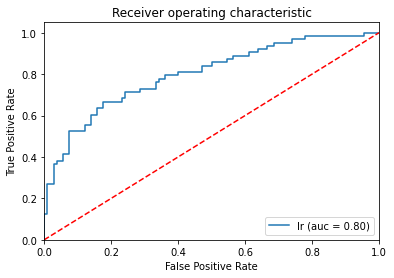

In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

lr_fpr, lr_tpr, threshold = roc_curve(y_test,y_score_lr)
auc_svc = auc(lr_fpr, lr_tpr)
plt.plot(lr_fpr, lr_tpr, label='lr (auc = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### C. Support Vector Machine Classifier

In [77]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

#Model evaluation
f1 = f1_score(y_test, y_pred_svc, average='weighted')
ac = accuracy_score(y_test, y_pred_svc, normalize=True)
recall = recall_score(y_test, y_pred_svc, average="weighted")
precision = precision_score(y_test, y_pred_svc, average="weighted")
roc3 = roc_auc_score(y_test, y_pred_svc)

print("********* SVC Results *********")
print('SVC : Accuracy = %.3f' % (ac))
print('SVC: F1 Score = %.3f' % (f1))
print('SVC: Recall = %.3f' % (recall))
print('SVC: Precision = %.3f' % (precision))
print('SVC: roc_auc = %.3f' % (roc3))

********* SVC Results *********
SVC : Accuracy = 0.772
SVC: F1 Score = 0.757
SVC: Recall = 0.772
SVC: Precision = 0.777
SVC: roc_auc = 0.717


#### Classification Report

In [78]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       108
           1       0.80      0.51      0.62        63

    accuracy                           0.77       171
   macro avg       0.78      0.72      0.73       171
weighted avg       0.78      0.77      0.76       171



#### Confusion Matrix

In [79]:
print(confusion_matrix(y_test,y_pred_svc))

[[100   8]
 [ 31  32]]


#### Tuning the hyper_parameters

In [80]:
#GridSearchCV helps us combine an estimator with a grid search preamble to tune hyper_parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf','sigmoid','poly']
             }
grid_svc = GridSearchCV(svc, param_grid, refit=True, verbose=2) 
grid_svc.fit(X_train, y_train)

#Best score and best parameter 
print("Best Score:" + str(grid_svc.best_estimator_))
print("Best Parameters: " + str(grid_svc.best_params_))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   23.9s finished


In [81]:
grid_svc_pred = grid_svc.predict(X_test)

#Model evaluation
f1 = f1_score(y_test, grid_svc_pred, average='weighted')
ac = accuracy_score(y_test, grid_svc_pred, normalize=True)
recall = recall_score(y_test, grid_svc_pred, average="weighted")
precision = precision_score(y_test, grid_svc_pred, average="weighted")
roc3 = roc_auc_score(y_test, grid_svc_pred)

print("********* SVC Results *********")
print('SVC : Accuracy = %.3f' % (ac))
print('SVC: F1 Score = %.3f' % (f1))
print('SVC: Recall = %.3f' % (recall))
print('SVC: Precision = %.3f' % (precision))
print('SVC: roc_auc = %.3f' % (roc3))

********* SVC Results *********
SVC : Accuracy = 0.778
SVC: F1 Score = 0.768
SVC: Recall = 0.778
SVC: Precision = 0.778
SVC: roc_auc = 0.731


#### ROC for the Model

In [82]:
y_score_svc = grid_svc.decision_function(X_test)

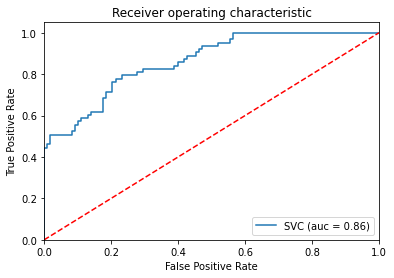

In [83]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

svc_fpr, svc_tpr, threshold = roc_curve(y_test,y_score_svc)
auc_svc = auc(svc_fpr, svc_tpr)
plt.plot(svc_fpr, svc_tpr, label='SVC (auc = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Classification Report

In [84]:
print(classification_report(y_test, grid_svc_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       108
           1       0.78      0.56      0.65        63

    accuracy                           0.78       171
   macro avg       0.78      0.73      0.74       171
weighted avg       0.78      0.78      0.77       171



#### Confusion Matrix

In [85]:
print(confusion_matrix(y_test,grid_svc_pred))

[[98 10]
 [28 35]]


### D. KNeighbors Classifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

print(train_scores)
print(test_scores)

[1.0, 0.8743718592964824, 0.8693467336683417, 0.8442211055276382, 0.821608040201005, 0.821608040201005, 0.8015075376884422, 0.7964824120603015, 0.7914572864321608, 0.7914572864321608, 0.7889447236180904, 0.7939698492462312, 0.7889447236180904, 0.7864321608040201, 0.7864321608040201, 0.7989949748743719, 0.7763819095477387, 0.7964824120603015, 0.7713567839195979]
[0.7017543859649122, 0.7192982456140351, 0.7076023391812866, 0.7719298245614035, 0.7660818713450293, 0.783625730994152, 0.7953216374269005, 0.7719298245614035, 0.7953216374269005, 0.7660818713450293, 0.7660818713450293, 0.7602339181286549, 0.7543859649122807, 0.7426900584795322, 0.7719298245614035, 0.7485380116959064, 0.7485380116959064, 0.7719298245614035, 0.7660818713450293]


#### Identify the number of neighbors that resulted in the max score in the training dataset

In [87]:
print("Number of neighbors that resulted max score in the training set: {}".format(train_scores.index(max(train_scores))+1))

Number of neighbors that resulted max score in the training set: 1


#### Identify the number of neighbors that resulted in the max score in the testing dataset

In [88]:
print("Number of neighbors that resulted max score in the testing set: {}".format(test_scores.index(max(test_scores))+1))

Number of neighbors that resulted max score in the testing set: 7


#### Plot the train and test model performance by number of neighbors

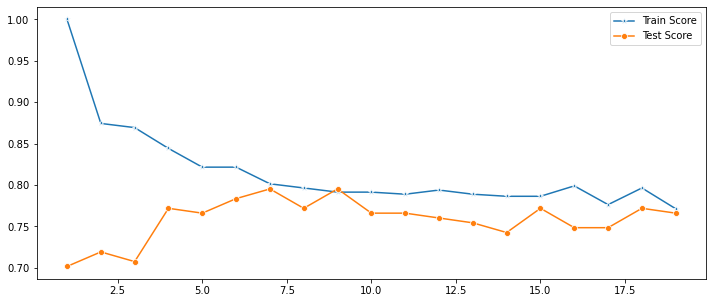

In [89]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

In [90]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

#Model evaluation
f1 = f1_score(y_test, y_pred_knn, average='weighted')
ac = accuracy_score(y_test, y_pred_knn, normalize=True)
recall = recall_score(y_test, y_pred_knn, average="weighted")
precision = precision_score(y_test, y_pred_knn, average="weighted")
roc4 = roc_auc_score(y_test, y_pred_knn)

print("********* KNeighborsClassifier Results *********")
print('KNN: Accuracy = %.3f' % (ac))
print('KNN: F1 Score = %.3f' % (f1))
print('KNN: Recall = %.3f' % (recall))
print('KNN: Precision = %.3f' % (precision))
print('KNN: roc_auc = %.3f' % (roc4))

********* KNeighborsClassifier Results *********
KNN: Accuracy = 0.795
KNN: F1 Score = 0.789
KNN: Recall = 0.795
KNN: Precision = 0.794
KNN: roc_auc = 0.759


It is underfitting because training accuracy decreases and testing accuracy seems decreasing or flat

#### Classification Report

In [92]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       108
           1       0.78      0.62      0.69        63

    accuracy                           0.80       171
   macro avg       0.79      0.76      0.77       171
weighted avg       0.79      0.80      0.79       171



#### Confusion Matrix

In [93]:
print(confusion_matrix(y_test,y_pred_knn))

[[97 11]
 [24 39]]


### 6. Conclusion

As we compare all the models above, KNeighbors Classifier model perform the best with an accuracy of 80%